In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from pytrends.request import TrendReq
from pprint import pprint
import string

# Import API key
from config import nyt_api_key
from config import gkey

## Generate Top Query List

In [2]:
type_list = [#"Arts", 
             #"Automobiles", 
             #"Blogs", 
             #"Books", 
             "Business Day", 
             #"Education", 
             #"Fashion & Style", 
             #"Food", 
             #"Health", 
             #"Job Market", 
             #"Magazine", 
             #"membercenter", 
             #"Movies", 
             "Multimedia", 
             "N.Y.%20%2F%20Region", 
             "NYT Now",  
             #"Open", 
             #"Opinion", 
             #"Public Editor", 
             #"Real Estate", 
             #"Science", 
             #"Sports", 
             #"Style", 
             "Sunday Review", 
             #"T Magazine", 
             #"Technology", 
             #"The Upshot", 
             #"Theater", 
             #"Times Insider", 
             "Today’s Paper", 
             #"Travel", 
             "U.S.", 
             "World", 
             #"Your Money"
]

# Initialize empty list to hold description facets
facets = []

# Loop through each type
for type in type_list:
    # Starting URL for NYT Most Shared API Call - Facebook
    url = f"http://api.nytimes.com/svc/mostpopular/v2/mostshared/{type}/facebook/30.json?"
    query_url = f"{url}api-key={nyt_api_key}"
    response = requests.get(query_url).json()

    # Loop through the list of articles, remove common punctuation, and perform a split
    for result in range(len(response['results'])):
        text = response['results'][result]['org_facet']
        for facet in text:
            facets.append(facet.lower())
            #print(facets)



In [18]:
# Create DataFrame with the top 5 (by value count) queries
facet_df=pd.DataFrame(facets).rename(columns={0:"Number of Appearances"})
top_queries = pd.DataFrame(facet_df['Number of Appearances'].value_counts()).head(20)
top_queries_reset = top_queries.reset_index()
top_queries_rnm = top_queries_reset.rename(columns={"index":"Facet"})
top_queries_rnm

,Facet,Number of Appearances
0,islamic state in iraq and syria (isis),3
1,justice department,3
2,immigration and emigration,2
3,democratic party,2
4,presidential election of 2016,2
5,frauds and swindling,2
6,roman catholic church,2
7,sex crimes,2
8,education department (us),2
9,espionage and intelligence services,2


In [4]:
# Construct keyword list for Google Trends
query_list = top_queries_rnm["Facet"].head()
kw_list = ["democratic party"]
# Configure Google Trends

pytrends = TrendReq(hl='en-US', tz=360)
# Add the keyword list in 
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-07 2018-09-07', geo='US',gprop='')
    
data_list = pytrends.interest_by_region(resolution='STATE')

data_list1 = data_list.loc[(data_list!=0).any(1)]
data_list1 = data_list1.reset_index()
data_list1['lat'] = ''
data_list1['lng'] = ''
data_list1

,geoName,democratic party,lat,lng
0,Alabama,51,,
1,Alaska,49,,
2,Arizona,42,,
3,Arkansas,42,,
4,California,43,,
5,Colorado,45,,
6,Connecticut,39,,
7,Delaware,38,,
8,District of Columbia,100,,
9,Florida,44,,


In [5]:
lat = []
lng = []
for city in data_list1['geoName']:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, gkey)
    geo_data = requests.get(target_url).json()
    lati = geo_data['results'][0]['geometry']['location']['lat']
    lngi = geo_data['results'][0]['geometry']['location']['lng']
    lat.append(lati)
    lng.append(lngi)

In [6]:
data_list1['lat'] = lat
data_list1['lng'] = lng
data_list1.head()

,geoName,democratic party,lat,lng
0,Alabama,51,32.318231,-86.902298
1,Alaska,49,64.200841,-149.493673
2,Arizona,42,34.048928,-111.093731
3,Arkansas,42,35.201050,-91.831833
4,California,43,36.778261,-119.417932


In [7]:
locations = data_list1[['lat','lng']].astype(float)
query_request = data_list1['democratic party'].astype(float)

In [8]:
gmaps.configure(api_key = gkey)

In [9]:
# Construct heat map for the query_request
fig = gmaps.figure(map_type="HYBRID")
heat_layer = gmaps.heatmap_layer(locations, weights=query_request,
                                dissipating=False, max_intensity=100, point_radius = 1)
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
pytrends.related_queries()

{'democratic party': {'top':                               query  value
  0              the democratic party    100
  1       democratic republican party     55
  2                  republican party     54
  3                        republican     52
  4                   political party     29
  5      what is the democratic party     20
  6                         democrats     18
  7   democratic and republican party     17
  8                    democrat party     16
  9                          democrat     15
  10      democratic party definition     13
  11        democratic party platform     12
  12            democratic definition     12
  13                   party platform     12
  14              democratic platform     11
  15                      republicans     10
  16      california democratic party     10
  17             new democratic party     10
  18        democratic national party     10
  19           democratic republicans     10
  20              us democra

In [12]:
# Construct bar graph for the related queries
related_query = pytrends.related_queries()
related_query_df = related_query['democratic party']['rising'].head(20)
related_query_df

,query,value
0,california democratic party endorsements 2018,43200
1,ca democratic party endorsements 2018,20750
2,texas democratic party convention 2018,19200
3,alexandria ocasio cortez,9250
4,league of women voters california,9050
5,franklin county democratic party sample ballot,6550
6,new hanover county democratic party,4550
7,california democratic party convention 2018,4400
8,how can a bill become a law without the signat...,2200
9,butler county democratic party,2200


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

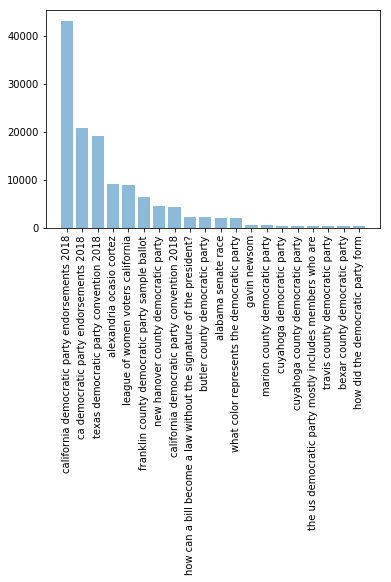

In [13]:
plt.bar(related_query_df['query'],related_query_df['value'],alpha=0.5, align="center")
plt.xticks(rotation=90)

In [14]:
# Display interest over time
overtime_interest = pytrends.interest_over_time()
overtime_interest.head(52)

,democratic party,isPartial
date,,
2017-09-10,36,False
2017-09-17,42,False
2017-09-24,52,False
2017-10-01,53,False
2017-10-08,52,False
2017-10-15,63,False
2017-10-22,62,False
2017-10-29,72,False
2017-11-05,100,False


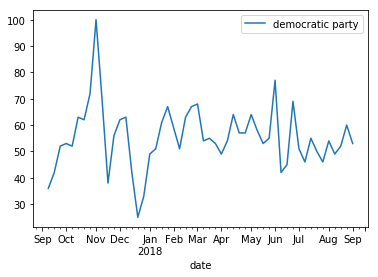

In [15]:
# Show trend line for given trend
lines  =  overtime_interest.plot.line()